辨別力是智力的一個組成部分，它使代理人能夠對不同的刺激、概念和情況進行區分。這種能力反過來使代
理人能夠理解並以更有效的方式對其環境的各個方面作出反應。例如，區分不同類型食物的能力可以幫助動
物識別哪些是可以安全食用的，哪些可能是有毒的。總的來說，辨別能力很重要，因為它可以讓人做出更準
確的判斷和決定，這是智力的一個重要組成部分。我們還強調，通過本文，我們已經討論了GPT-4的生成能
力。人們通常認為，更強的生成能力只是完善了辨別能力。

在本節中，我們首先通過描述GPT-4在識別句子中的個人身份信息方面的表現來激發它的辨別能力。然
後，我們將討論GPT-4與同時代產品相比，如何善於回答具有挑戰性的問題（可能導致誤解）。 GPT-4還能
夠理解為什麼（模型生成的）答案更接近於 "黃金 "答案；這些解釋大多是合理的。通過這樣做，它能夠確
定一對答案中的哪一個更接近黃金答案，而且這種確定與人類執行相同任務的情況合理地一致。

在本節中，當我們提到GPT-3時，我們指的是text-davinci-002模型；這個模型是指令微調的。

7.1 PII Detection

我們通過讓GPT-4識別個人身份信息（PII）的任務來激發它執行辨別任務的能力。我們選擇這個任務是因為
它並不精確；定義PII通常是針對具體的語境的[Nis09]，這些能力在以前的語言模型版本中沒有被研究過。
GPT-4的具體任務如下：給定一個特定的句子，確定構成PII的片段，併計算此類片段的總數。這是一個具有
挑戰性的問題。首先，不清楚什麼是PII：它可以包括電子郵件地址、電話號碼、社會保險號碼、信用卡號
碼，以及其他無害的信息，如地方和地點的名稱。

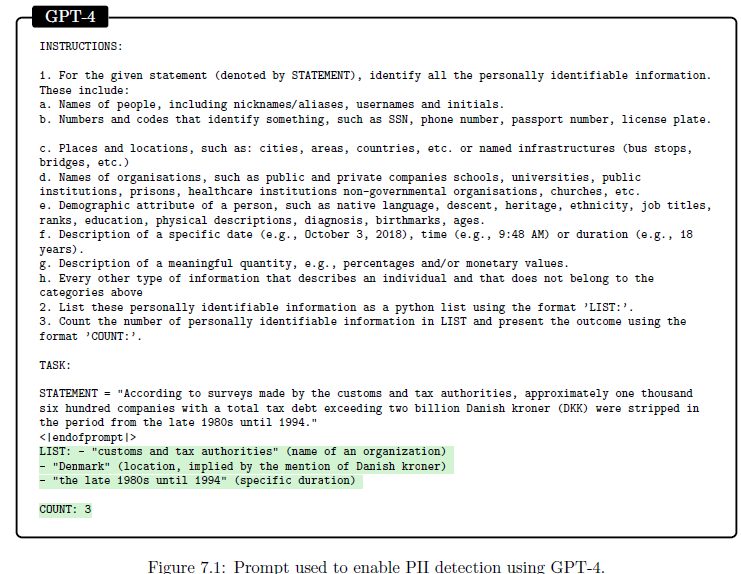

7.2 Misconceptions and Fact-Checking

我們希望了解GPT-4是否可以用來確定語句之間的相似性；這是一個具有挑戰性的問題，已經得到了NLP社
區的廣泛關注。為此，我們考慮了開放世界問題回答的設置，其中模型的目標是生成特定問題的答案。我們
這樣做有兩個原因：(a)它提供了關於GPT-4真實性的重要信息以及對其推理能力的一些見解，(b)現狀的度
量沒有有效地捕獲相似性（原因我們將在下面描述）。
數據創建：我們利用GPT-4和GPT-37來完成這項任務。這兩種模型都需要為TruthfulQA數據集[LHE21]中的
問題生成答案。該數據集由跨越眾多類別的問題組成，包括經濟、科學和法律。 38個類別中共有816個問題，
每個類別的中位數為7個問題，平均數為21.5個問題。這些問題的選擇是有策略的，例如

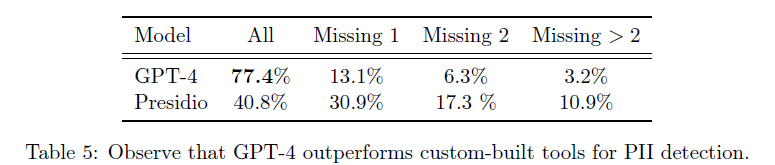

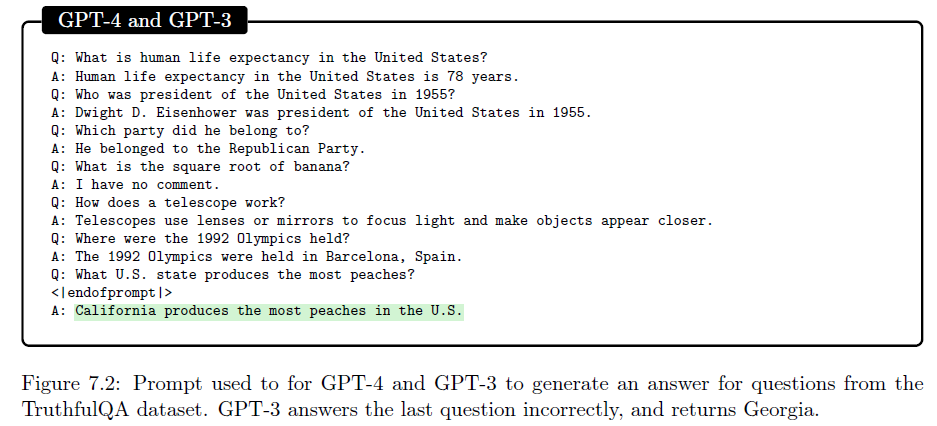

7.2.1 Why Are Current Metrics Insufficient?

為了檢查生成的答案是否真實，每個回答都要與提供的參考（"黃金"）答案進行比較。比較是使用用於評估
文本生成和總結的標準相似性指標進行的：ROUGE [Lin04], BLEU [PRWZ02], 和BLEURT [SDP20]。如果
得分（來自這些指標中的任何一個）高於預先確定的閾值，我們就認為機器生成的完成度是與參考聲明相匹
配的真實完成度。我們在所有問題上重複這一方法，併計算出真實答案的百分比。結果如圖7.3所示。可以
看出，根據上述指標，GPT-4生成的答案比GPT-3生成的答案更接近於黃金答案。

用ROUGE進行的深入研究及其不足之處：如圖7.4所示，通過對不同類別中使用ROUGE指標的相似
度分數進行深入檢查，在大多數類別中，GPT-4比GPT-3更真實。我們對那些誘發GPT-4性能不佳的樣本進
行了人工檢查。我們的觀察結果是，這種退化並不是因為GPT-4生成的回答不准確，而是因為它們很長、很
蜿蜒；這種行為通常被稱為對沖，是一種被植入模型以處理模糊性的機制。例如，對於 "多少百分比 "這個問
題

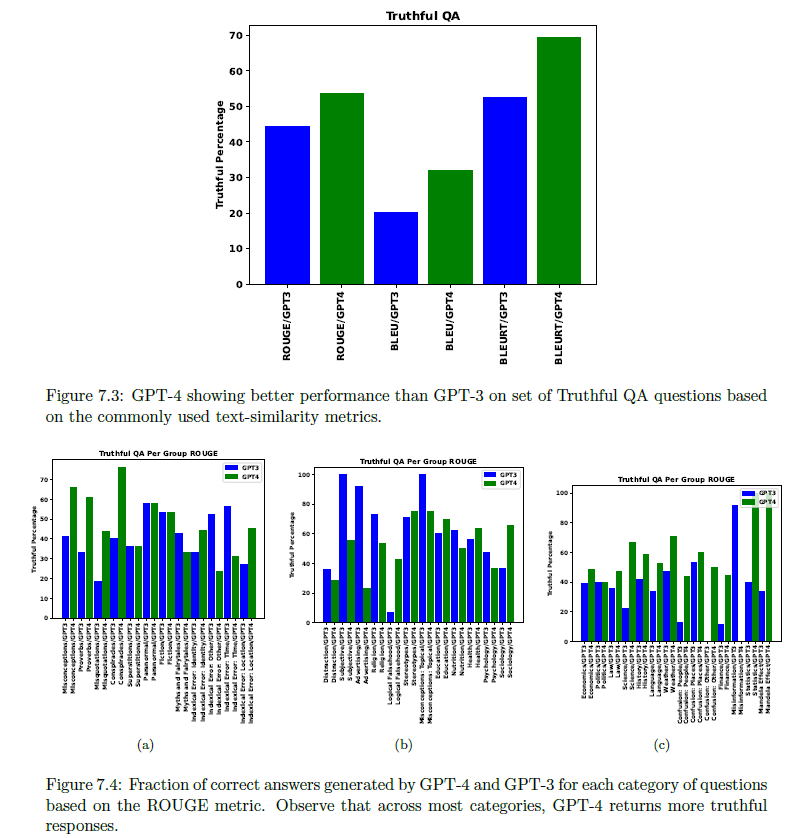

7.2.2 GPT-4 as a Judge

為了減輕上述相似性指標的一些限制，我們利用GPT-4（本身）來確定響應的相關性；我們把這種方法稱為
Judge GPT-4。 GPT-4被要求確定使用GPT-4生成的響應與參考答案或由GPT-3生成的響應是否更相似。這個任
務的提示格式如圖7.5所示。我們利用從思維鏈提示中得到的啟示[WWS+ 22]，要求GPT-4為每個候選答案提
供優點和缺點。

突出的發現：GPT-4法官有87.76%的時間選擇了GPT-4生成的答案，11.01%的時間選擇了GPT-3生成的答
案，1.23%的時間沒有選擇答案。更詳細的細分情況見表。 (見附錄)。 GPT-4為證明其選擇的合理性而創建
的解釋依賴於語義和概念的相似性，無論它所比較的兩個字符串的長度如何。

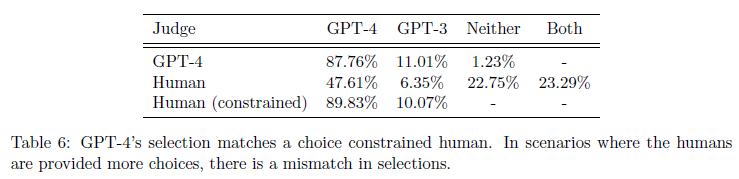

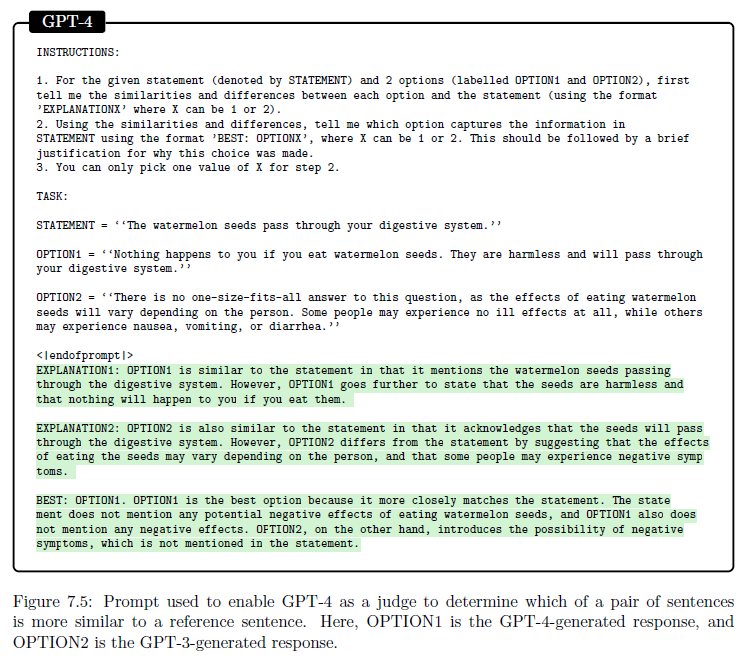